<a href="https://colab.research.google.com/github/YeshChav/Apollo/blob/main/finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow==2.10

In [5]:
import transformers
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

RuntimeError: ignored

In [2]:
pip install tensorflow

  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [5]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [2]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

RuntimeError: ignored

In [7]:
!pip install keras==2.6.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.6.0 which is incompatible.


In [38]:
import transformers
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
!pip install keras_preprocessing


In [40]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
root_path = '/content/justice143.csv'


In [42]:
df = pd.read_csv("/content/justice143.csv", sep=";")


In [43]:
df.head(10)

,Unnamed: 0,facts,disposition,issue_area
0,NaN,"<p>In 1970, Jane Roe (a fictional name used in...",reversed,NaN
1,NaN,<p>Joan Stanley had three children with Peter ...,reversed/remanded,Civil Rights
2,NaN,<p>John Giglio was convicted of passing forged...,reversed/remanded,Due Process
3,NaN,"<p>The Idaho Probate Code specified that ""male...",reversed/remanded,Civil Rights
4,NaN,"<p>Miller, after conducting a mass mailing cam...",vacated/remanded,First Amendment
5,NaN,<p>Ernest E. Mandel was a Belgian professional...,reversed,First Amendment
6,NaN,<p>The Illinois Crime Investigating Commission...,NaN,Criminal Procedure
7,NaN,<p>Jon Argersinger was an indigent charged wit...,reversed,Criminal Procedure
8,NaN,<p>William Baird gave away Emko Vaginal Foam t...,affirmed,Privacy
9,NaN,<p>A Georgia state court convicted Johnny Wils...,affirmed,First Amendment


In [44]:
import pandas as pd

# Specify the columns you want to keep
columns_to_keep = ["facts", "disposition", "issue_area"]

# Read the CSV file with only the selected columns
df = pd.read_csv("/content/justice143.csv", sep=";", usecols=columns_to_keep)

# Now, df contains only the specified columns


In [45]:
df.head()

,facts,disposition,issue_area
0,"<p>In 1970, Jane Roe (a fictional name used in...",reversed,NaN
1,<p>Joan Stanley had three children with Peter ...,reversed/remanded,Civil Rights
2,<p>John Giglio was convicted of passing forged...,reversed/remanded,Due Process
3,"<p>The Idaho Probate Code specified that ""male...",reversed/remanded,Civil Rights
4,"<p>Miller, after conducting a mass mailing cam...",vacated/remanded,First Amendment


In [46]:
df["facts"]= df["facts"].str.replace("<p>", "")

In [47]:
df.head(10)

,facts,disposition,issue_area
0,"In 1970, Jane Roe (a fictional name used in co...",reversed,NaN
1,Joan Stanley had three children with Peter Sta...,reversed/remanded,Civil Rights
2,John Giglio was convicted of passing forged mo...,reversed/remanded,Due Process
3,"The Idaho Probate Code specified that ""males m...",reversed/remanded,Civil Rights
4,"Miller, after conducting a mass mailing campai...",vacated/remanded,First Amendment
5,Ernest E. Mandel was a Belgian professional jo...,reversed,First Amendment
6,The Illinois Crime Investigating Commission wa...,NaN,Criminal Procedure
7,Jon Argersinger was an indigent charged with c...,reversed,Criminal Procedure
8,William Baird gave away Emko Vaginal Foam to a...,affirmed,Privacy
9,A Georgia state court convicted Johnny Wilson ...,affirmed,First Amendment


In [52]:
df.shape

(3303, 4)

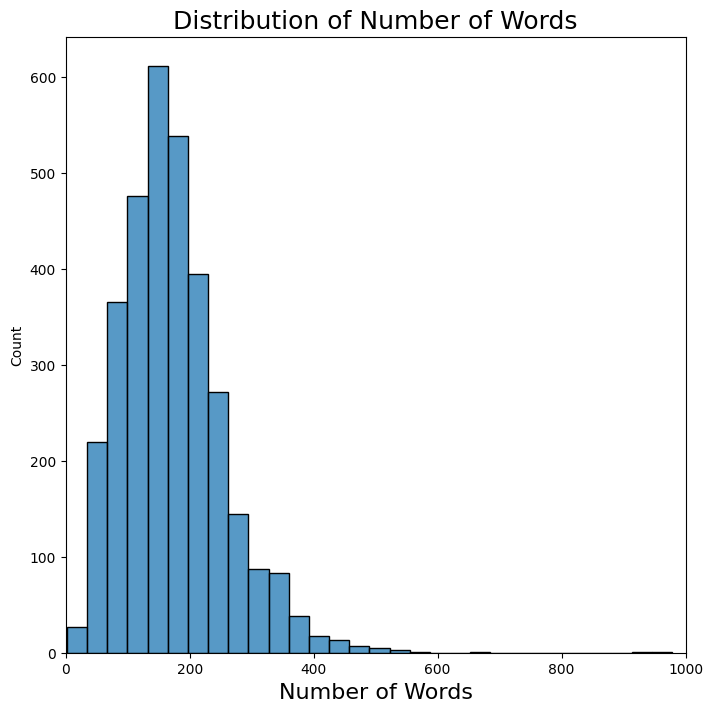

In [53]:
plt.figure(figsize=(8, 8))
sns.histplot(df['count'], bins=30)  # You can adjust the number of bins as needed
plt.xlim(0, 1000)
plt.xlabel('Number of Words', fontsize=16)
plt.title('Distribution of Number of Words', fontsize=18)
plt.show()

In [54]:
category_count = df['issue_area'].value_counts()

categories = category_count.index

categories

Index(['Criminal Procedure', 'Civil Rights', 'Economic Activity',
       'First Amendment', 'Judicial Power', 'Due Process', 'Federalism',
       'Privacy', 'Unions', 'Federal Taxation', 'Attorneys', 'Miscellaneous',
       'Private Action', 'Interstate Relations'],
      dtype='object')

In [55]:
category_count

Criminal Procedure      859
Civil Rights            568
Economic Activity       542
First Amendment         353
Judicial Power          342
Due Process             128
Federalism              125
Privacy                  70
Unions                   60
Federal Taxation         51
Attorneys                37
Miscellaneous            20
Private Action            4
Interstate Relations      2
Name: issue_area, dtype: int64

In [57]:
category_count.index

Index(['Criminal Procedure', 'Civil Rights', 'Economic Activity',
       'First Amendment', 'Judicial Power', 'Due Process', 'Federalism',
       'Privacy', 'Unions', 'Federal Taxation', 'Attorneys', 'Miscellaneous',
       'Private Action', 'Interstate Relations'],
      dtype='object')

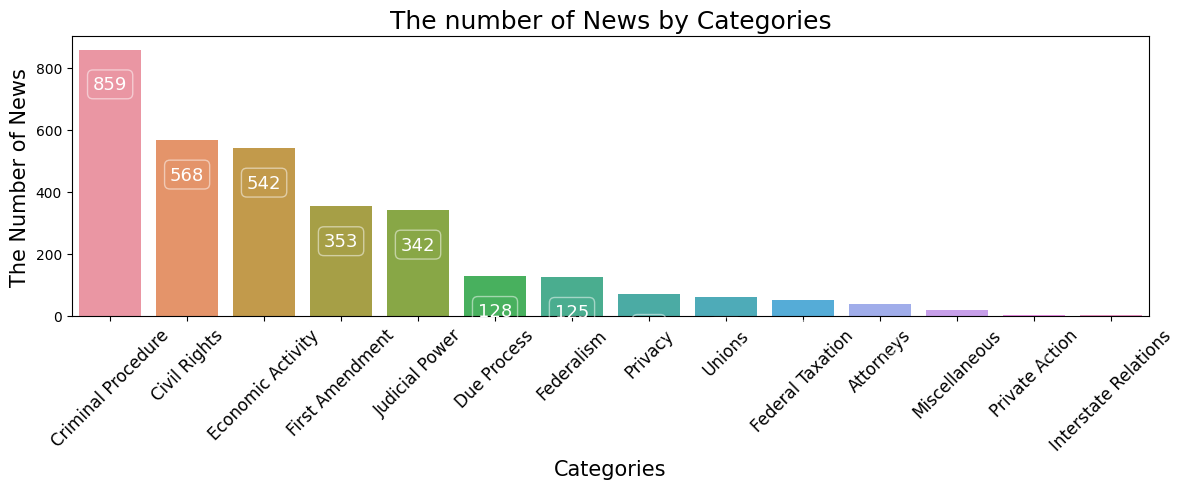

In [70]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

sns.barplot(x=category_count.index, y=category_count)

for a, p in enumerate(ax.patches):
    ax.annotate(format(p.get_height(), '.0f'), xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, -25), size=13, color='white', ha='center', va='center',
                textcoords='offset points', bbox=dict(boxstyle='round', facecolor='none', edgecolor='white', alpha=0.5))

plt.xlabel('Categories', size=15)
plt.ylabel('The Number of News', size=15)

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=45, size=12)

plt.title("The number of News by Categories", size=18)

plt.tight_layout()
plt.show()


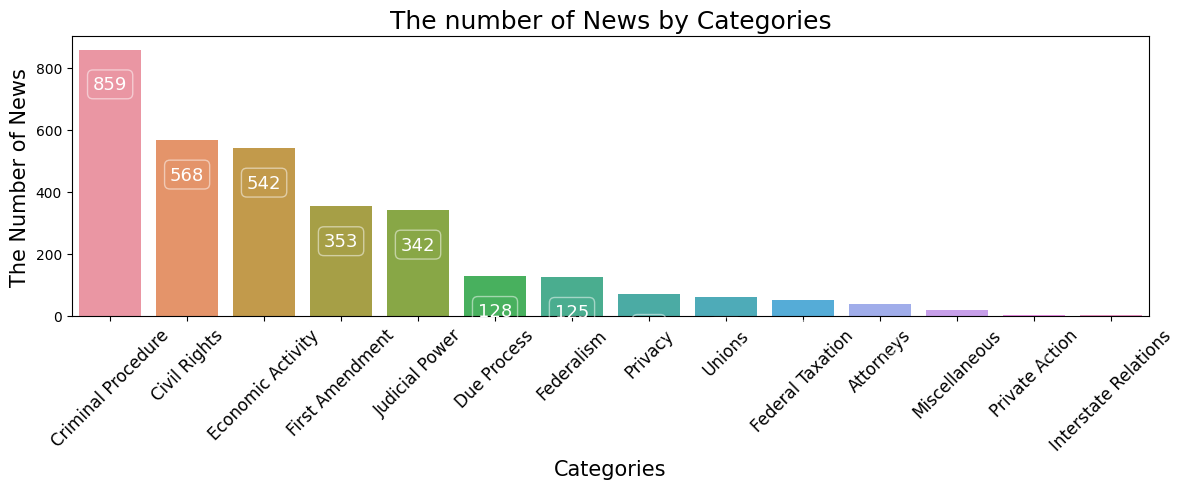

In [78]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

sns.barplot(x=categories, y=category_count)

for a, p in enumerate(ax.patches):
    ax.annotate(format(p.get_height(), '.0f'), xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, -25), size=13, color='white', ha='center', va='center',
                textcoords='offset points', bbox=dict(boxstyle='round', facecolor='none', edgecolor='white', alpha=0.5))

plt.xlabel('Categories', size=15)
plt.ylabel('The Number of News', size=15)

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=45, size=12)

plt.title("The number of News by Categories", size=18)

plt.tight_layout()
plt.show()


In [80]:
df['issue_area'].unique()


array([nan, 'Civil Rights', 'Due Process', 'First Amendment',
       'Criminal Procedure', 'Privacy', 'Federal Taxation',
       'Economic Activity', 'Judicial Power', 'Unions', 'Federalism',
       'Attorneys', 'Miscellaneous', 'Interstate Relations',
       'Private Action'], dtype=object)

In [83]:
df['encoded_text'] = df['issue_area'].astype('category').cat.codes

df.head(10)

,facts,disposition,issue_area,count,encoded_text
0,"In 1970, Jane Roe (a fictional name used in co...",reversed,NaN,78,-1
1,Joan Stanley had three children with Peter Sta...,reversed/remanded,Civil Rights,116,1
2,John Giglio was convicted of passing forged mo...,reversed/remanded,Due Process,77,3
3,"The Idaho Probate Code specified that ""males m...",reversed/remanded,Civil Rights,59,1
4,"Miller, after conducting a mass mailing campai...",vacated/remanded,First Amendment,41,7
5,Ernest E. Mandel was a Belgian professional jo...,reversed,First Amendment,344,7
6,The Illinois Crime Investigating Commission wa...,NaN,Criminal Procedure,225,2
7,Jon Argersinger was an indigent charged with c...,reversed,Criminal Procedure,59,2
8,William Baird gave away Emko Vaginal Foam to a...,affirmed,Privacy,59,11
9,A Georgia state court convicted Johnny Wilson ...,affirmed,First Amendment,100,7


In [84]:

df.dropna(inplace=True)


In [85]:
df.shape

(3105, 5)

In [87]:
data_facts = df['facts'].to_list()

data_encoded_text = df['encoded_text'].to_list()

In [88]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )


train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.01, random_state = 0 )

In [89]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))


val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

NameError: ignored